# Support Vector Machine

Import the used Python libraries:

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.model_selection import GridSearchCV


Load the dataset and remove unsused columns:

In [50]:
df = pd.read_csv('ai4i2020.csv')

df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


Preparing the data

In [51]:
# Separate features and target variable
X = df.drop(columns=['Machine failure'])    # Features
y = df['Machine failure']                   # Target variable

Feature scaling

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Test-train split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

SVM implementation

In [54]:
svm_model = SVC(kernel='rbf', random_state=42)  # Use 'linear' kernel for linear data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

Prediction

In [55]:
y_pred = svm_model.predict(X_test)

Prediction results

In [56]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1935    4]
 [  43   18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.82      0.30      0.43        61

    accuracy                           0.98      2000
   macro avg       0.90      0.65      0.71      2000
weighted avg       0.97      0.98      0.97      2000


Accuracy Score:
0.9765


Confusion matrix visualization

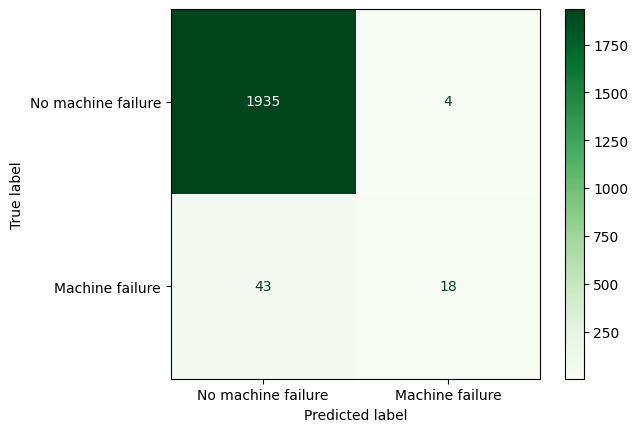

In [57]:
sns.reset_orig()
y_predicted = svm_model.predict(X_test) >= 1
labels = ['No machine failure','Machine failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Greens', xticks_rotation='horizontal')
plt.show()

Grid search

In [59]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [60]:
# Best Parameters
print("Best Parameters:", grid.best_params_)

# Evaluate on test data
grid_predictions = grid.predict(X_test)
print("\nClassification Report After Tuning:")
print(classification_report(y_test, grid_predictions))

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Classification Report After Tuning:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.68      0.46      0.55        61

    accuracy                           0.98      2000
   macro avg       0.83      0.73      0.77      2000
weighted avg       0.97      0.98      0.97      2000



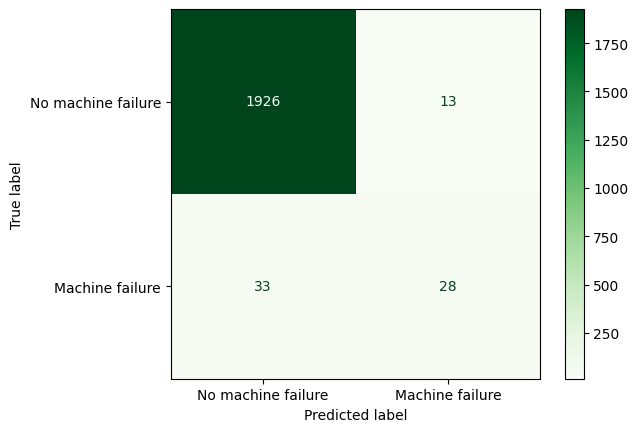

In [61]:
sns.reset_orig()
y_predicted = grid.predict(X_test) >= 1
labels = ['No machine failure','Machine failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Greens', xticks_rotation='horizontal')
plt.show()